# PART C

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<class 'numpy.int64'>
<class 'numpy.float64'>


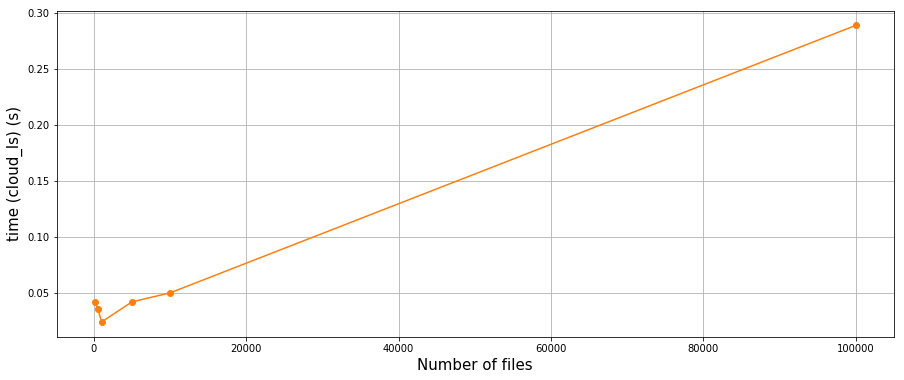

In [2]:
ls_times = pd.read_csv('no_buck/time.txt', sep=";", header=None, names=['N', 'Time'], decimal = ",")

#Check elements dtype formatting
print(type(ls_times["N"][1]))
print(type(ls_times.Time[1]))

plt.figure(figsize=(15,6)); ax = plt.axes()
ax.plot(ls_times.N, ls_times.Time, marker='o', color='C1')
ax.set_xlabel('Number of files', fontsize=15)
ax.set_ylabel('time (cloud_ls) (s)', fontsize=15)
ax.grid()
plt.savefig('part_c_1.png')


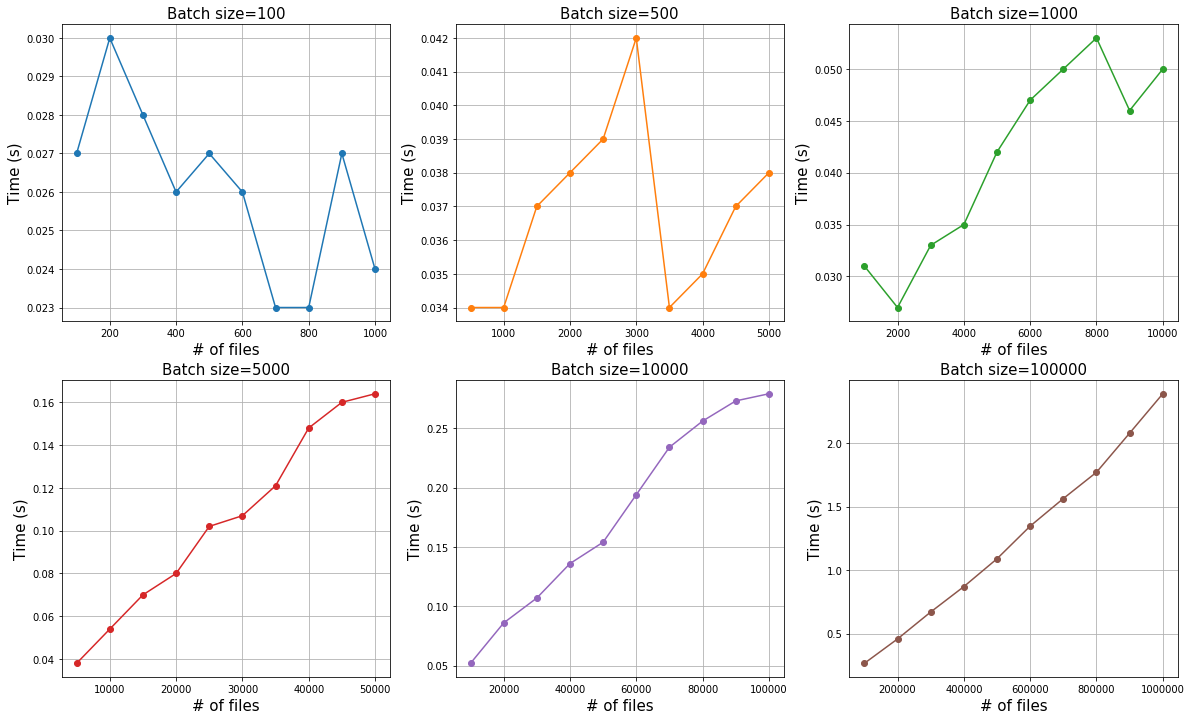

In [3]:
data = pd.read_csv('no_buck/time_final.txt', sep=";", header=None, names=['Batchsize', 'Time'], decimal = ",")

# Plot the results
fig, ax = plt.subplots(2,3, figsize=(20,12))
np.unique(data.Batchsize)
k=0
for j,val in enumerate(np.unique(data.Batchsize)):
    ax[j//3,j - k].plot(np.arange(val,10*val+val, val), data.Time[data.Batchsize==val], 
                        marker='o', color='C'+str(j))
    ax[j//3,j - k].set_xlabel('# of files', fontsize=15)
    ax[j//3,j - k].set_ylabel('Time (s)', fontsize=15)
    ax[j//3,j - k].set_title(('Batch size='+str(val)), fontsize=15)
    ax[j//3,j - k].grid()
    if j%3==0:
        k+=3
plt.savefig('part_c_2.png')

***
# PART D

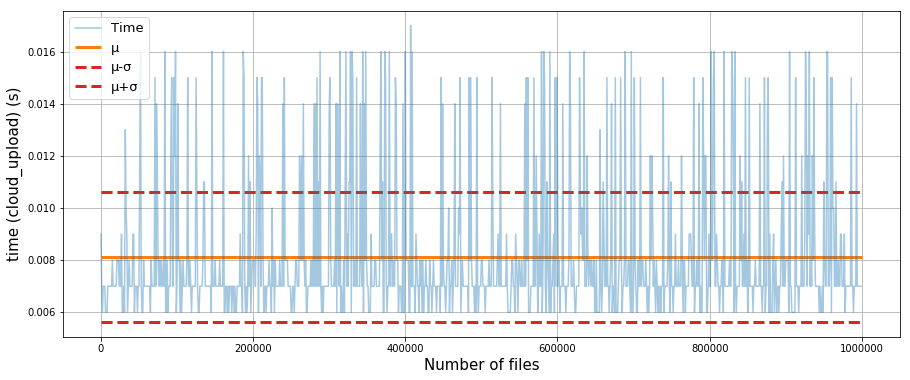

In [4]:
upload_times = pd.read_csv('no_buck/time_1mill.txt', header=None, sep=";", 
                           decimal = ",", names=['N_files', 'Time'])

#Plot
plt.figure(figsize=(15,6)); ax=plt.axes()
ax.plot(upload_times.N_files[1:1000000:1000], upload_times.Time[1:1000000:1000], alpha=0.4)
ax.hlines(np.mean(upload_times.Time), 0, 1000000, color="C1",linewidth=3, label='μ')
ax.hlines(np.mean(upload_times.Time) - np.std(upload_times.Time), 0, 1000000, 
          color="C3",linewidth=3,linestyle='--', label='μ-σ')
ax.hlines(np.mean(upload_times.Time) + np.std(upload_times.Time), 0, 1000000, 
          color="C3",linewidth=3,linestyle='--', label='μ+σ')
ax.set_xlabel("Number of files", fontsize=15)
ax.set_ylabel("time (cloud_upload) (s)", fontsize=15)
ax.legend(fontsize=13)
ax.grid()
plt.savefig("part_d_1.png")
plt.show()

In [5]:
#Load the cloud_ls 1000000 files record and append to the dataframe
one_mill = pd.read_csv('no_buck/temp_final.txt', sep=";", header=None, names=['Time'], decimal = ",")
one_mill['N']=1000000
data_new = ls_times.append(one_mill, sort=True)
display(data_new)

,N,Time
0,100,0.042
1,500,0.036
2,1000,0.024
3,5000,0.042
4,10000,0.050
5,100000,0.289
0,1000000,2.294


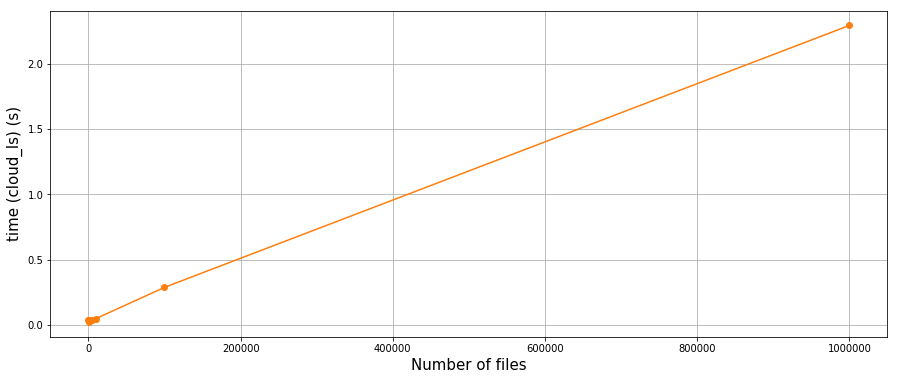

In [6]:
#Plot
plt.figure(figsize=(15,6)); ax = plt.axes()
ax.plot(data_new.N, data_new.Time, marker='o', color='C1')
ax.set_xlabel('Number of files', fontsize=15)
ax.set_ylabel('time (cloud_ls) (s)', fontsize=15)
ax.grid()
plt.savefig('part_d_2.png')

# PART E

,N,Time,B_Time
0,100,0.042,0.007
1,500,0.036,0.005
2,1000,0.024,0.008
3,5000,0.042,0.011
4,10000,0.050,0.021
5,100000,0.289,0.142


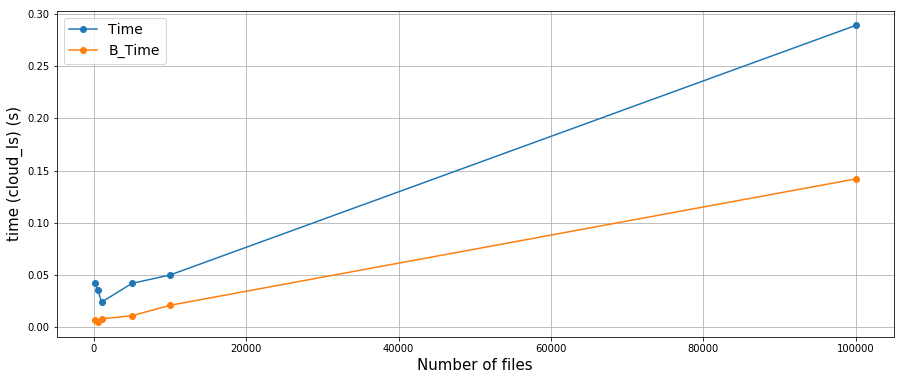

In [7]:
n_ls_times = pd.read_csv('w_buck/time.txt', sep=";", header=None, names=['N', 'Time'], decimal = ",")

ls_times["B_Time"]=n_ls_times['Time']
display(ls_times)

plt.figure(figsize=(15,6)); ax = plt.axes()
ax.plot(ls_times.N, ls_times.Time, marker='o', color='C0')
ax.plot(ls_times.N, ls_times.B_Time, marker='o', color='C1')
ax.set_xlabel('Number of files', fontsize=15)
ax.set_ylabel('time (cloud_ls) (s)', fontsize=15)
ax.legend(fontsize=14)
ax.grid()
plt.savefig('part_e_1.png')

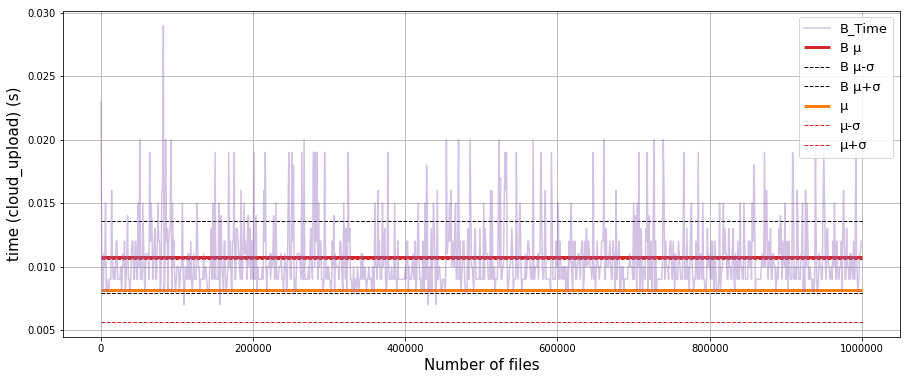

In [8]:
n_upload_times = pd.read_csv('w_buck/time_1mill.txt', header=None, sep=";", 
                           decimal = ",", names=['N_files', 'Time'])
upload_times["B_Time"]=n_upload_times['Time']

#Plot
plt.figure(figsize=(15,6)); ax=plt.axes()
ax.plot(upload_times.N_files[1:1000000:1000], upload_times.B_Time[1:1000000:1000], alpha=0.4, color='C4')
ax.hlines(np.mean(upload_times.B_Time), 0, 1000000, color="C3",linewidth=3, label='B μ')
ax.hlines(np.mean(upload_times.B_Time) - np.std(upload_times.B_Time), 0, 1000000, 
          color="black",linewidth=1,linestyle='--', label='B μ-σ')
ax.hlines(np.mean(upload_times.B_Time) + np.std(upload_times.B_Time), 0, 1000000, 
          color="black",linewidth=1,linestyle='--', label='B μ+σ')
ax.hlines(np.mean(upload_times.Time), 0, 1000000, color="C1",linewidth=3, label='μ')
ax.hlines(np.mean(upload_times.Time) - np.std(upload_times.Time), 0, 1000000, 
          color="C3",linewidth=1,linestyle='--', label='μ-σ')
ax.hlines(np.mean(upload_times.Time) + np.std(upload_times.Time), 0, 1000000, 
          color="C3",linewidth=1,linestyle='--', label='μ+σ')
ax.set_xlabel("Number of files", fontsize=15)
ax.set_ylabel("time (cloud_upload) (s)", fontsize=15)
ax.legend(fontsize=13)
ax.grid()
plt.savefig('part_e_2.png')